In [1]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.AnalysisHelper import plot_results_3d, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [2]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "wut"
dataset = "trapped_lovers"
methods = ["NBC_TI (TODO)", "NBC", "sklearn_kmeans"]

## Loading benchmark dataset

In [3]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([2, 1, 3, 4])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [4]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC clusterization

In [5]:
%%time
model = NBC()
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 797 ms
Wall time: 292 ms


## NBC-TI clusterization

In [6]:
%%time
model = NBC_TI()
results["NBC_TI (TODO)"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)
results.keys()

CPU times: total: 562 ms
Wall time: 206 ms


dict_keys(['sklearn_kmeans', 'NBC', 'NBC_TI (TODO)'])

## Comparison

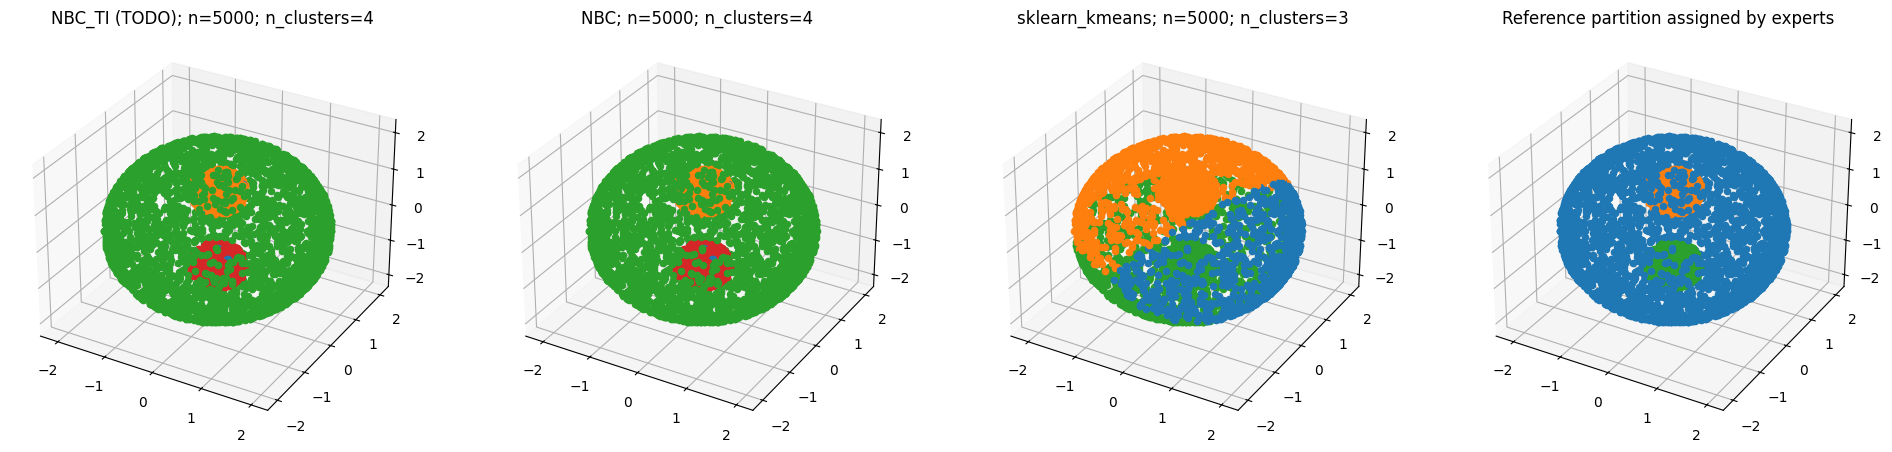

In [7]:
plot_results_3d(benchmark.data, methods, results, reference)

In [8]:
confusion_matricies_table(methods, results, reference)

╒═════════════════════════╤═════════════════════════╤═════════════════════╕
│ NBC_TI (TODO) k=3:      │ NBC k=3:                │ sklearn_kmeans k=3: │
│ [[   3    0 2997    0]  │ [[   3    0 2997    0]  │ [[ 861 1054 1085]   │
│  [   5  995    0    0]  │  [   5  995    0    0]  │  [   0 1000    0]   │
│  [   4    0   16  980]] │  [   4    0   16  980]] │  [   0    0 1000]]  │
╘═════════════════════════╧═════════════════════════╧═════════════════════╛


In [9]:
measures(methods, results, reference)

╒═══════════════╤═════╤════════════════╕
│ NBC_TI (TODO) │ NBC │ sklearn_kmeans │
╘═══════════════╧═════╧════════════════╛
